# Handwritten Number Recognition with Keras and MNIST

In this notebook, we'll be building a neural network that recognizes handwritten numbers 0-9. 

This kind of neural network is used in a variety of real-world applications including: recognizing phone numbers and sorting postal mail by address. To build the network, we'll be using the **MNIST** data set, which consists of images of handwritten numbers and their correct labels 0-9.

We'll be using [TFLearn](http://tflearn.org/), a high-level library built on top of TensorFlow to build the neural network. We'll start off by importing all the modules we'll need, then load the data, and finally build the network.

In [1]:
# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

## Retrieving training and test data

The MNIST data set already contains both training and test data. There are 55,000 data points of training data, and 10,000 points of test data.

Each MNIST data point has:
1. an image of a handwritten digit and 
2. a corresponding label (a number 0-9 that identifies the image)

We'll call the images, which will be the input to our neural network, **X** and their corresponding labels **Y**.

We're going to want our labels as *one-hot vectors*, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

### Flattened data

For this example, we'll be using *flattened* data or a representation of MNIST images in one dimension rather than two. So, each handwritten number image, which is 28x28 pixels, will be represented as a one dimensional array of 784 pixel values. 

Flattening the data throws away information about the 2D structure of the image, but it simplifies our data so that all of the training data can be contained in one array whose shape is [55000, 784]; the first dimension is the number of training images and the second dimension is the number of pixels in each image. This is the kind of data that is easy to analyze using a simple neural network.

In [2]:
# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz


/Users/ssatpati/anaconda2/envs/python3/lib/python3.5/gzip.py:274: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return self._buffer.read(size)
/Users/ssatpati/anaconda2/envs/python3/lib/python3.5/site-packages/tflearn/datasets/mnist.py:52: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
print('Training Data Shape',trainX.shape)
print('Training Labels Shape',trainY.shape)
print('Testing Data Shape',testX.shape)
print('Testing Labels Shape',testY.shape)

Training Data Shape (55000, 784)
Training Labels Shape (55000, 10)
Testing Data Shape (10000, 784)
Testing Labels Shape (10000, 10)


## Visualize the training data

Provided below is a function that will help you visualize the MNIST data. By passing in the index of a training example, the function `show_digit` will display that training image along with it's corresponding label in the title.

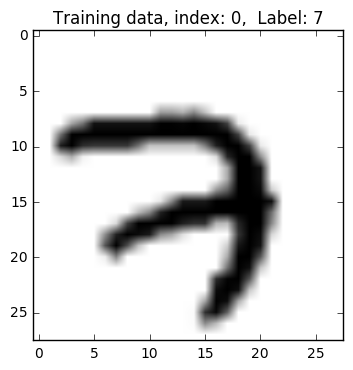

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(0)

## Visualize the training data - 10 examples of each digit

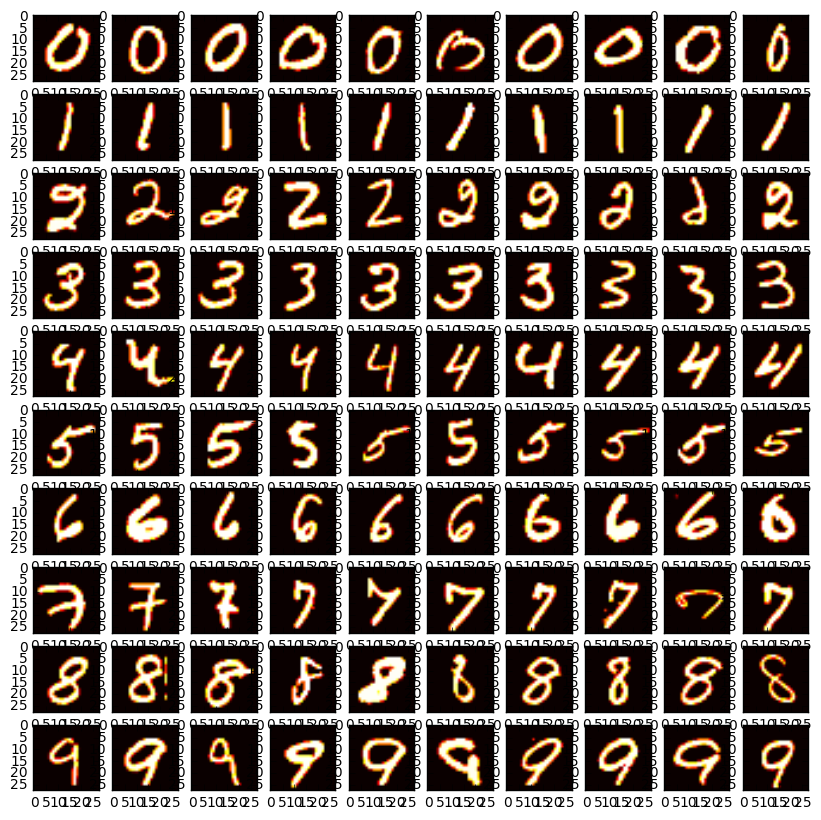

In [5]:
trainY_labels = trainY.argmax(axis=1)
fig = plt.figure(figsize=(10,10))
cols = 10
cnt_tot = 0
for i in range(0,9+1):
    # Get index of labels: 0,1,2,..9
    idx = (trainY_labels == i).nonzero()
    # Get the first so many(cols) indices
    for idx in idx[0][:cols]:
        fig.add_subplot(10,cols,cnt_tot+1)
        image = trainX[idx].reshape([28,28])
        plt.imshow(image, cmap='hot')
        cnt_tot += 1

# Building the network using Keras

### Credits:
http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


## Baseline Model

In [7]:
num_pixels = trainX.shape[1]
num_classes = trainY.shape[1]
print('### num_pixels', num_pixels)
print('### num_classes', num_classes)

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
	model.add(Dense(num_classes, init='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

### num_pixels 784
### num_classes 10


In [8]:
# build the model
model = baseline_model()
# Fit the model
model.fit(trainX, trainY, validation_data=(testX, testY), nb_epoch=10, batch_size=200, verbose=2)

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2948 - acc: 0.9168 - val_loss: 0.1482 - val_acc: 0.9577
Epoch 2/10
3s - loss: 0.1171 - acc: 0.9666 - val_loss: 0.1060 - val_acc: 0.9664
Epoch 3/10
3s - loss: 0.0755 - acc: 0.9784 - val_loss: 0.0847 - val_acc: 0.9744
Epoch 4/10
3s - loss: 0.0547 - acc: 0.9845 - val_loss: 0.0686 - val_acc: 0.9780
Epoch 5/10
3s - loss: 0.0389 - acc: 0.9892 - val_loss: 0.0681 - val_acc: 0.9775
Epoch 6/10
4s - loss: 0.0288 - acc: 0.9920 - val_loss: 0.0691 - val_acc: 0.9772
Epoch 7/10
3s - loss: 0.0206 - acc: 0.9950 - val_loss: 0.0728 - val_acc: 0.9773
Epoch 8/10
3s - loss: 0.0163 - acc: 0.9964 - val_loss: 0.0627 - val_acc: 0.9806
Epoch 9/10
3s - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0670 - val_acc: 0.9792
Epoch 10/10
4s - loss: 0.0086 - acc: 0.9985 - val_loss: 0.0624 - val_acc: 0.9814


In [9]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print(scores)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

[0.06242309823665855, 0.98140000000000005]
Baseline Error: 1.86%


## Simple CNN using Keras

In [14]:
print(trainX.shape, testX.shape)

trainX = trainX.reshape(trainX.shape[0], 1, 28, 28).astype('float32')
testX = testX.reshape(testX.shape[0], 1, 28, 28).astype('float32')

(55000, 1, 28, 28) (10000, 1, 28, 28)


In [15]:
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [16]:
def simple_cnn_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [17]:
# build the model
model = simple_cnn_model()
# Fit the model
model.fit(trainX, trainY, validation_data=(testX, testY), nb_epoch=10, batch_size=200, verbose=2)

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
74s - loss: 0.2513 - acc: 0.9284 - val_loss: 0.0787 - val_acc: 0.9768
Epoch 2/10
74s - loss: 0.0741 - acc: 0.9782 - val_loss: 0.0561 - val_acc: 0.9811
Epoch 3/10
79s - loss: 0.0544 - acc: 0.9836 - val_loss: 0.0457 - val_acc: 0.9857
Epoch 4/10
70s - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0386 - val_acc: 0.9863
Epoch 5/10
68s - loss: 0.0337 - acc: 0.9893 - val_loss: 0.0377 - val_acc: 0.9871
Epoch 6/10
67s - loss: 0.0278 - acc: 0.9913 - val_loss: 0.0406 - val_acc: 0.9876
Epoch 7/10
67s - loss: 0.0226 - acc: 0.9927 - val_loss: 0.0432 - val_acc: 0.9860
Epoch 8/10
67s - loss: 0.0191 - acc: 0.9939 - val_loss: 0.0322 - val_acc: 0.9898
Epoch 9/10
67s - loss: 0.0161 - acc: 0.9950 - val_loss: 0.0376 - val_acc: 0.9886
Epoch 10/10
67s - loss: 0.0154 - acc: 0.9946 - val_loss: 0.0332 - val_acc: 0.9901
